In [93]:
!eval $(opam env) && snarky_cli build linear_regression.zk --curve Bn128

Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'


In [94]:
!eval $(opam env) && snarky_cli generate-keys linear_regression.zk --curve Bn128

dune exec --root .linear_regression.snarky.build ./linear_regression_gen.exe -- generate-keys --proving-key=linear_regression.pk --verification-key=linear_regression.vk
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Swap is not beneficial, not performing
* QAP number of variables: 465
* QAP pre degree: 458
* QAP degree: 512
* QAP number of input variables: 16
* G1 window: 8
* G2 window: 7
* G1 elements in PK: 1893
* Non-zero G1 elements in PK: 1861
* G2 elements in PK: 467
* Non-zero G2 elements in PK: 435
* PK size in bits: 723746
* G1 elements in VK: 16
* G2 elements in VK: 1
* GT elements in VK: 1
* VK size in bits: 6377


In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [103]:
x = [-1.0, 1.5, 2.3, 3.1, 4.4, 6.4, 7.2, 8.2]
#y = [13.0, 24.1, 40.1, 31.1, 44.5, 50.1, 33.3, 60.6]
y = [13.0, 24.1, -1.3, 31.1, 4.4, -4.4, -17.2, -48.2]

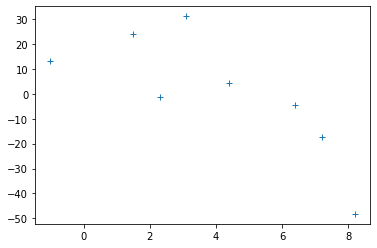

In [104]:
plt.plot(x, y, "+")
plt.show()

In [105]:
def to_fixedpoint_field(x):
    curve_order = 21888242871839275222246405745257275088548364400416034343698204186575808495617
    t = int(x * 2**16)
    if t < 0:
        t = t + curve_order
    return t

In [106]:
x_fp = list(map(to_fixedpoint_field, x))
y_fp = list(map(to_fixedpoint_field, y))

In [107]:
snarky_commandline = "snarky_cli prove linear_regression.zk " + " ".join(map(str, x_fp)) + " " + " ".join(map(str, y_fp))

In [108]:
!eval $(opam env) && {snarky_commandline}

dune exec --root .linear_regression.snarky.build ./linear_regression_gen.exe -- prove --proving-key=linear_regression.pk 21888242871839275222246405745257275088548364400416034343698204186575808430081 98304 150732 203161 288358 419430 471859 537395 851968 1579417 21888242871839275222246405745257275088548364400416034343698204186575808410421 2038169 288358 21888242871839275222246405745257275088548364400416034343698204186575808207259 21888242871839275222246405745257275088548364400416034343698204186575807368398 21888242871839275222246405745257275088548364400416034343698204186575805336782
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Entering directory '/home/df/local/snarky/snarky-examples/.linear_regression.snarky.build'
Division result: 262962
Division result: 12288
Mean of x values: 262962
Mean of y values: 12288
m numerator prered: 21888242871839275222246405745257275088548364400416034343698204184783395091088
m numerator: 2188824287183927522224

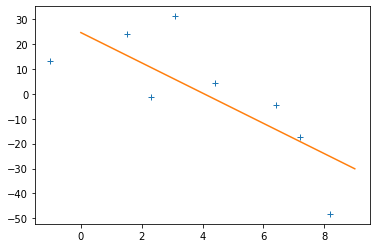

In [110]:
m = -6.07035827637
b = 24.544708252


interpolate_x = list(range(10))
interpolate_y = [m*xi + b for xi in interpolate_x]
plt.plot(x, y, "+")
plt.plot(interpolate_x, interpolate_y)
plt.show()

In [3]:
from scipy.stats import linregress

In [4]:
linregress(x, y)

NameError: name 'x' is not defined